# Analyzing borrowers’ risk of defaulting

Project Report by Allentine Paulis

## Description

This project is to prepare a report for a bank’s loan division. We’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

The report will be considered when building a **credit scoring** of a potential customer. A **credit scoring** is used to evaluate the ability of a potential borrower to repay their loan.

## Data
- `children`: the number of children in the family
- `days_employed`: how long the customer has been working
- `dob_years`: the customer’s age
- `education`: the customer’s education level
- `education_id`: identifier for the customer’s education
- `family_status`: the customer’s marital status
- `family_status_id`: identifier for the customer’s marital status
- `gender`: the customer’s gender
- `income_type`: the customer’s income type
- `debt`: whether the customer has ever defaulted on a loan
- `total_income`: monthly income
- `purpose`: reason for taking out a loan

### Step 1. Open the data file and have a look at the general information. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("credit_scoring_eng.csv")
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
# Checking the percentage
data.isnull().sum()/len(data) *100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

In [6]:
# Checking data columns that has dtypes number to check if it has negative values
columns = data.select_dtypes(include=np.number).columns
columns

Index(['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'debt', 'total_income'],
      dtype='object')

In [7]:
# Checking every column above if it has negative values
for col in columns:
    percent = data[data[col]<0][col].count() / len(data)
    rows = data[data[col]<0][col].count() 
    print(f"Column {col} has {percent:.2%} % of negative values which is {rows} negative rows")

Column children has 0.22% % of negative values which is 47 negative rows
Column days_employed has 73.90% % of negative values which is 15906 negative rows
Column dob_years has 0.00% % of negative values which is 0 negative rows
Column education_id has 0.00% % of negative values which is 0 negative rows
Column family_status_id has 0.00% % of negative values which is 0 negative rows
Column debt has 0.00% % of negative values which is 0 negative rows
Column total_income has 0.00% % of negative values which is 0 negative rows


In [8]:
data['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [9]:
# To see all statistical values
data.describe(include='all')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
count,21525.000000,19351.000000,21525.000000,21525,21525.000000,21525,21525.000000,21525,21525,21525.000000,19351.000000,21525
unique,NaN,NaN,NaN,15,NaN,5,NaN,3,8,NaN,NaN,38
top,NaN,NaN,NaN,secondary education,NaN,married,NaN,F,employee,NaN,NaN,wedding ceremony
freq,NaN,NaN,NaN,13750,NaN,12380,NaN,14236,11119,NaN,NaN,797
mean,0.538908,63046.497661,43.293380,NaN,0.817236,NaN,0.972544,NaN,NaN,0.080883,26787.568355,NaN
std,1.381587,140827.311974,12.574584,NaN,0.548138,NaN,1.420324,NaN,NaN,0.272661,16475.450632,NaN
min,-1.000000,-18388.949901,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,3306.762000,NaN
25%,0.000000,-2747.423625,33.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,16488.504500,NaN
50%,0.000000,-1203.369529,42.000000,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,23202.870000,NaN
75%,1.000000,-291.095954,53.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,32549.611000,NaN


### Conclusion

* There are 21525 rows and 12 columns
* There are 5 integer, 2 float and 5 object dtypes
* The 12 columns are children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, and purpose
* There are 2174 missing values (10%) in days_employed and 2174 missing values (10%) in total_income
* There are 15 unique values for education, 5 unique values for family, 3 unique values for gender (need to check why it has 3), 8 unique values for  income_type and 38 unique values for purpose. The purpose column need to be categorized and word processed. 
* The children column minimum is -1, which is very weird. It supposed to be min zero if people don't have children. It has 0.2% negative values. The children maximum column is 20, which is pretty weird in real life situation but it's still possible. 
* days_employed contains negative values 73.9%, there might be something wrong with the data collection, it can be change to positive values with the absolute transform, however the max days_employed is 401k days which is 1115 years, it seems impossible number to be employed. The mean number is 63k days which is 175 years. The unit of days is maybe incorrect, maybe the unit of hours employed is more make sense. days_employed also has missing value of 10 percent. Because days_employed has negative values, wrong/unclear unit, and 10% missing, it's better to drop the whole column for the integrity of data, except if we can get more information.
* dob_years has 0 minimum value, which is not possible for this age to borrow loan.

### Step 2. Data preprocessing

In [10]:
# Dropping days_employed column since it contains 73.9% negative valules, wrong/unclear unit and 10% missing
data.drop('days_employed', axis=1, inplace=True)

### Processing missing values

In [11]:
data['total_income'].sort_values(ascending=False)

12412    362496.645
19606    352136.354
9169     276204.162
20809    274402.943
17178    273809.483
            ...    
21489           NaN
21495           NaN
21497           NaN
21502           NaN
21510           NaN
Name: total_income, Length: 21525, dtype: float64

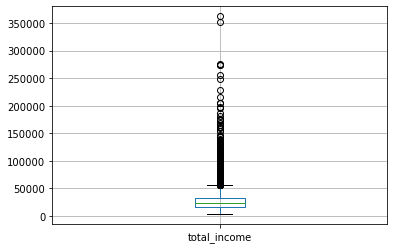

In [12]:
# checking if there is outlier
data.boxplot('total_income')

I used median not mean, since there is outliers of total income more than 300k

In [13]:
# Filling missing values with median
data['total_income'] = data['total_income'].fillna(data['total_income'].median())

In [14]:
data['total_income'].unique()

array([40620.102, 17932.802, 23341.752, ..., 14347.61 , 39054.888,
       13127.587])

In [15]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [16]:
data['children'].value_counts()/len(data['children'])*100

 0     65.732869
 1     22.383275
 2      9.547038
 3      1.533101
 20     0.353078
-1      0.218351
 4      0.190476
 5      0.041812
Name: children, dtype: float64

There are 47 children (0.21%) that has -1. There is no other information why it has negative values. 
The options are to transform to absolute value or to drop the rows or to replace it with NaN then fill it with median with the rest of NaN in this column. 

In this solution, we will delete this rows of -1 children, this rows will become NaN and will be filled with median

In [17]:
data['children'] = data[data['children']!=-1]['children']

In [18]:
data['children'].dtypes

dtype('float64')

In [19]:
data['children'].isnull().sum()

47

In [20]:
data['children'].value_counts()

0.0     14149
1.0      4818
2.0      2055
3.0       330
20.0       76
4.0        41
5.0         9
Name: children, dtype: int64

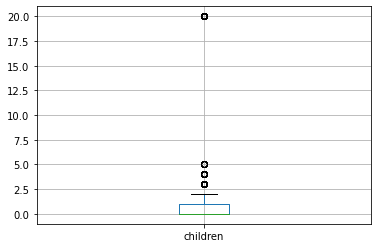

In [21]:
data.boxplot('children')

I used median not mean, since there is an outlier of customers have 20 children.

In [22]:
# Filling missing values with median
data['children'] = data['children'].fillna(data['children'].median())

In [23]:
data['children'].value_counts()

0.0     14196
1.0      4818
2.0      2055
3.0       330
20.0       76
4.0        41
5.0         9
Name: children, dtype: int64

In [24]:
data[data['dob_years']==0]['dob_years'].value_counts()

0    101
Name: dob_years, dtype: int64

In [25]:
data[data['dob_years']==0]['dob_years'].value_counts()/len(data['dob_years'])*100

0    0.469222
Name: dob_years, dtype: float64

There are 101 customers (0.47%) that has 0 dob_years. We are going to delete this rows and it will be replaced with NaN

In [26]:
data['dob_years'] = data[data['dob_years']!=0]['dob_years']

In [27]:
data['dob_years'].isnull().sum()

101

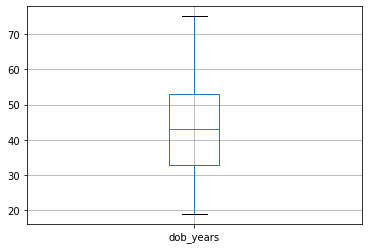

In [28]:
data.boxplot('dob_years')

In [29]:
# Filling missing values with mean since there is no outliers
# During the preprocessing, the data type is changing into float so we convert its type back again into integer to get mean integer.
data['dob_years'] = data['dob_years'].fillna(data['dob_years'].mean()).astype('int64') 

In [30]:
data['dob_years'].value_counts()

35    617
43    614
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [31]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [32]:
data.loc[data['gender'] == 'XNA','gender'] = 'F'

In [33]:
data['gender'].value_counts()

F    14237
M     7288
Name: gender, dtype: int64

In [34]:
data.isnull().sum()

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Conclusion

- days_employed column was dropped
- total_income missing values were filled with median since there were outliers
- in children column, we delete the rows -1, this rows became NaN and were filled with median since there were outliers
- in dob_years column, we delete people with 0 dob_years, this rows became NaN and were filled with median
- There is weird type of gender, so I fill 1 XNA gender with mode which is F gender and gender has 2 unique values
- There is no missing values left

### Data type replacement

In [35]:
# After data preprocessing
data.dtypes

children            float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [36]:
data['children'] = data['children'].astype('int64')

In [37]:
data.dtypes

children              int64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

### Conclusion

- Because of data preprocessing and the filling of missing values with the median, some column dtypes is changing from int to float so we need to replace it back again with int64
- children is replaced to integer type since there is no half of children. 
- total_income is still float type since currency is usually allowed decimal especially rounded to 2 decimal places
- how to keep the dtypes not changing during data preprocessing? or will it naturally changing?

### Processing duplicates

The education column has some same words but with different capitalize letter, so we are going to apply lower case to this education column

In [38]:
data['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [39]:
data['education'] = data['education'].str.lower()

In [40]:
data['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [41]:
data['education'].nunique()

5

In [42]:
#Before drop duplicates
data.shape

(21525, 11)

In [43]:
# Checking the duplicates
data.duplicated().sum()

71

In [44]:
# Percentage of duplicates
data.duplicated().sum()/len(data)*100

0.32984901277584205

In [45]:
# Drop the duplicate
data = data.drop_duplicates().reset_index(drop=True)

In [46]:
#After drop duplicates
data.shape

(21454, 11)

### Conclusion

- There are 71 duplicates which is 0.33% so we drop them.
- The education columns doesn't have duplicate unique values (from 15 to 5 unique values)

### Categorizing Data

Columns that can be categorized:
- total_income : low, middle, upper middle, high
- age : young, middle, upper middle, senior
- purpose : for example house, car, wedding, ... (need to be explored below)
- family_status : there might be a relationship between family_status and family_status_id
- education : there might be a relationship between education and education_id

#### Categorizing total_income

In [47]:
low = data['total_income'].quantile(q=0.25)
middle = data['total_income'].quantile(q=0.5)
upper_middle = data['total_income'].quantile(q=0.75)

def total_income_category(income):
    if income <= low:
        return 'Low'
    elif income <= middle:
        return 'Middle'
    elif income <= upper_middle:
        return 'Upper Middle'
    else:
        return 'High'    

In [48]:
data['total_income_category'] = data['total_income'].apply(total_income_category)

In [49]:
data['total_income_category'].value_counts()

Middle          6415
High            5364
Low             5364
Upper Middle    4311
Name: total_income_category, dtype: int64

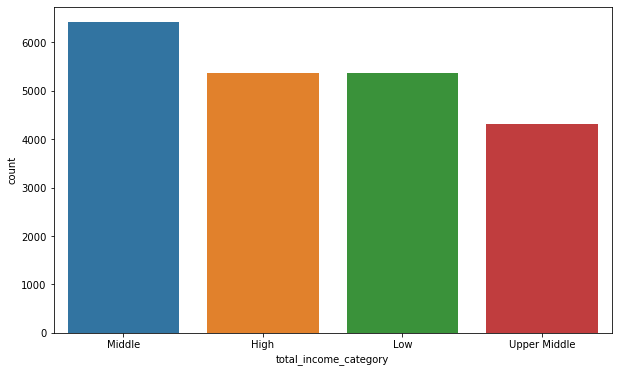

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.countplot(x='total_income_category', data=data, order= data['total_income_category'].value_counts().index)
plt.show()

#### Categorizing age

In [54]:
def age_category(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle'
    elif age <= 65:
        return 'Upper Middle'
    else:
        return 'Senior'

In [55]:
data['age_category'] = data['dob_years'].apply(age_category)

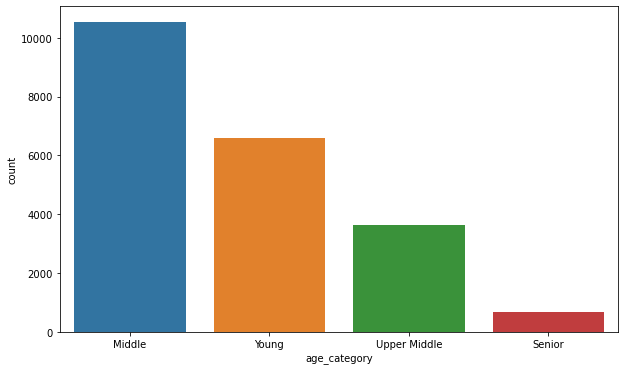

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(x='age_category', data=data, order= data['age_category'].value_counts().index)
plt.show()

#### Checking Family Status 

In [57]:
data['family_status'].value_counts()

married              12339
civil partnership     4151
unmarried             2810
divorced              1195
widow / widower        959
Name: family_status, dtype: int64

In [58]:
data['family_status_id'].value_counts()

0    12339
1     4151
4     2810
3     1195
2      959
Name: family_status_id, dtype: int64

In [59]:
# Checking to see if family_status_id = 0 is all married as the only unique value
data[data['family_status_id']==0]['family_status'].unique()

array(['married'], dtype=object)

In [60]:
# Loop all family_status_id to check if family_status_id = 0 is married in family_status, family status id = 1 is civil partnership, etc
for i in range(len(data['family_status_id'].value_counts())):
    family_category = data[data['family_status_id']==i]['family_status'].unique()
    print(f"family_status_id = {i} is {family_category[0]} family_status")

family_status_id = 0 is married family_status
family_status_id = 1 is civil partnership family_status
family_status_id = 2 is widow / widower family_status
family_status_id = 3 is divorced family_status
family_status_id = 4 is unmarried family_status


In [61]:
# another way to confirm checking if all rows that has family_status_id equals to zero is all married family_status
all((data['family_status_id']==0)==(data['family_status']=='married'))

True

My suspicion that family_status_id has relationship with family_status is True.

In [62]:
# after exploring, this is the easy way to see the relationship
data.groupby('family_status_id')['family_status'].value_counts()

family_status_id  family_status    
0                 married              12339
1                 civil partnership     4151
2                 widow / widower        959
3                 divorced              1195
4                 unmarried             2810
Name: family_status, dtype: int64

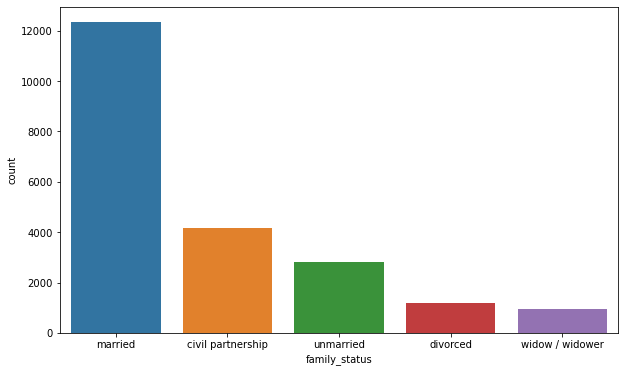

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(x='family_status', data=data, order= data['family_status'].value_counts().index)
plt.show()

#### Checking Education Status

In [64]:
data[data['education_id']==0]['education'].unique()

array(["bachelor's degree"], dtype=object)

In [65]:
# Loop all education_id to check if education is all unique values from education_id
for i in range(len(data['education_id'].value_counts())):
    education_category = data[data['education_id']==i]['education'].unique()
    print(f"education_id = {i} is {education_category[0]} education")

education_id = 0 is bachelor's degree education
education_id = 1 is secondary education education
education_id = 2 is some college education
education_id = 3 is primary education education
education_id = 4 is graduate degree education


In [66]:
# another way to confirm checking if all rows that has education_id equals to zero is all bachelor's degree
all((data['education_id']==0)==(data['education']=="bachelor's degree"))

True

It is true that there is relationship between education_id and education

In [67]:
# after exploring for awhile, this is the easy way to see the relationship
data.groupby('education_id')['education'].value_counts()

education_id  education          
0             bachelor's degree       5250
1             secondary education    15172
2             some college             744
3             primary education        282
4             graduate degree            6
Name: education, dtype: int64

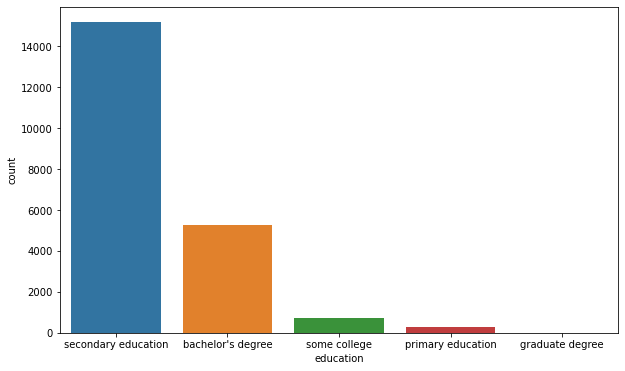

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', data=data, order= data['education'].value_counts().index)
plt.show()

#### Categorizing Purpose

In [69]:
from nltk.stem import SnowballStemmer 
english_stemmer = SnowballStemmer('english')

In [70]:
def stemming_purpose(purpose):
    return ' '.join([english_stemmer.stem(word)for word in purpose.split(' ')])

In [71]:
data['purpose_category']= data['purpose'].apply(stemming_purpose)

In [72]:
data['purpose_category'].unique()

array(['purchas of the hous', 'car purchas', 'supplementari educ',
       'to have a wed', 'hous transact', 'educ', 'have a wed',
       'purchas of the hous for my famili', 'buy real estat',
       'buy commerci real estat', 'buy residenti real estat',
       'construct of own properti', 'properti', 'build a properti',
       'buy a second-hand car', 'buy my own car',
       'transact with commerci real estat', 'build a real estat', 'hous',
       'transact with my real estat', 'car', 'to becom educ',
       'second-hand car purchas', 'get an educ', 'wed ceremoni',
       'to get a supplementari educ', 'purchas of my own hous',
       'real estat transact', 'get higher educ', 'to own a car',
       'purchas of a car', 'profil educ', 'univers educ',
       'buy properti for rent out', 'to buy a car', 'hous renov',
       'go to univers'], dtype=object)

In [73]:
def purpose_category(stem_purpose):
    if 'hous' in stem_purpose or 'properti' in stem_purpose:
        return 'house' 
    elif 'estat' in stem_purpose or 'real' in stem_purpose:
        return 'real estate'
    elif 'car' in stem_purpose:
        return 'car'
    elif 'educ' in stem_purpose or 'univers' in stem_purpose:
        return 'education'
    elif 'wed' in stem_purpose:
        return 'wedding'
    else:
        return 'other'

In [74]:
data['purpose_category']= data['purpose_category'].apply(purpose_category)

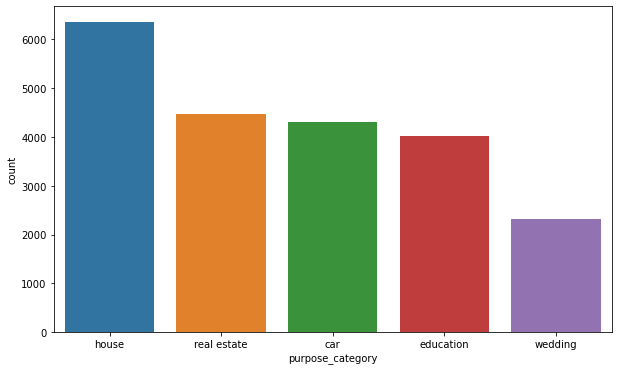

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose_category', data=data, order= data['purpose_category'].value_counts().index)
plt.show()

In [76]:
data['purpose_category'].value_counts()

house          6347
real estate    4464
car            4306
education      4013
wedding        2324
Name: purpose_category, dtype: int64

### Conclusion

- There is relationship between family_status_id and family_status. We can said family_status is category of family_status_id. Basically we can drop one of them since they are the same. However I don't want to drop both because the family_status category (married, civil partnership, etc) is useful for analysis. The family_status_id will be useful because it's similar to Ordinal Encoder which is converting features into integer encoding. If this project will be developed further to be used for machine learning algorithm, since ML algorithm can only process numerical, and the categorical value need to be converted into numerical as well, for those reasons I will leave this integer value of family_status_id. We can drop the column of family_status before we are applying ML model. But for the analysis here, we need family_status. 
- Family status is useful to be analyzed if maybe married people take more loan for their needs.
- There is also relationship between education_id and education. Education is category of education_id. for the same reason above, we are not going to drop both. 
- There is imbalance values in Education in graduate degree. Education is useful to be analyzed if maybe more educated people want to get a loan for a house. 
- Total_income category has balancely distribution, the category will be helpful to be reviewed and analyzed
- The age category can be useful to check who most likely to have loans.
- For the purpose category, the highest purpose people get loan is for getting a house. If house and real estate combined to become property, they both will be the highest reason people getting loan.

### Step 3. Answer these questions

- ####  Is there a relation between having kids and repaying a loan on time?

In [77]:
having_children = data['children'][data['children'] > 0].count()
having_children_percent = round(having_children/len(data['children']) *100 , 2)
print(f"Total customers have children is {having_children} from {len(data['children'])} customers which is {having_children_percent}%")

Total customers have children is 7316 from 21454 customers which is 34.1%


In [78]:
no_children = data['children'][data['children'] == 0].count()
no_children_percent = round(no_children/len(data['children']) *100 , 2)
print(f"Total customers have NO children is {no_children} from {len(data['children'])} customers which is {no_children_percent}%")

Total customers have NO children is 14138 from 21454 customers which is 65.9%


In [79]:
parent_have_debt = data['children'][(data['children']>0) & (data['debt']==1)].count()
parent_debt_percent = round(parent_have_debt / having_children  * 100, 2)
print(f"Total parents have debt is {parent_have_debt} from total {having_children} parents which is {parent_debt_percent}%") 

Total parents have debt is 677 from total 7316 parents which is 9.25%


In [80]:
parent_no_debt = data['children'][(data['children']>0) & (data['debt']==0)].count()
parent_no_debt_percent = round(parent_no_debt / having_children  * 100, 2)
print(f"Total parents have NO debt is {parent_no_debt} from total {having_children} parents which is {parent_no_debt_percent}%")

Total parents have NO debt is 6639 from total 7316 parents which is 90.75%


In [81]:
no_children_debt = data['children'][(data['children']==0) & (data['debt']==1)].count()
no_children_debt_percent = round(no_children_debt / no_children  * 100, 2)
print(f"Total no children have no debt is {no_children_debt} from total {no_children} no children which is {no_children_debt_percent}%") 

Total no children have no debt is 1064 from total 14138 no children which is 7.53%


In [82]:
no_children_no_debt = data['children'][(data['children']==0) & (data['debt']==0)].count()
no_children_no_debt_percent = round(no_children_no_debt / no_children  * 100, 2)
print(f"Total no children have no debt is {no_children_no_debt} from total {no_children} no children which is {no_children_no_debt_percent}%") 

Total no children have no debt is 13074 from total 14138 no children which is 92.47%


In [83]:
# With the loop
for status in data['children'].unique():
    children_status = data['children'][(data['children']==status) & (data['debt']==0)].count()
    total = data['children'][data['children']==status].count()
    children_status_percent = round(children_status/ total * 100, 2)
    print(f"{children_status_percent}% of customers with {status} children have paid their loans on time")

90.77% of customers with 1 children have paid their loans on time
92.47% of customers with 0 children have paid their loans on time
91.82% of customers with 3 children have paid their loans on time
90.55% of customers with 2 children have paid their loans on time
90.24% of customers with 4 children have paid their loans on time
89.47% of customers with 20 children have paid their loans on time
100.0% of customers with 5 children have paid their loans on time


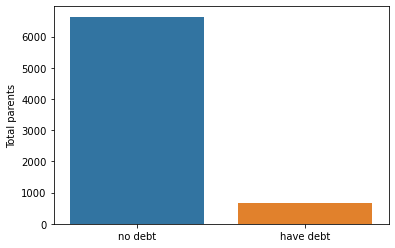

In [84]:
sns.barplot(x=['no debt','have debt'], y=data[data['children'] > 0]['debt'].value_counts())
plt.ylabel("Total parents")
plt.show()

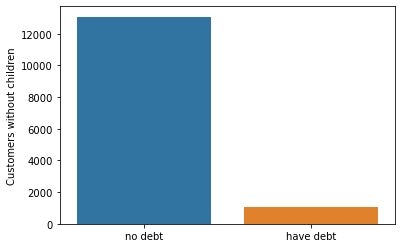

In [85]:
sns.barplot(x=['no debt','have debt'], y=data[data['children'] == 0]['debt'].value_counts())
plt.ylabel("Customers without children")
plt.show()

In [86]:
# Using Pivot Table
children_pivot = data.pivot_table(index=['children'], values=['debt'], aggfunc=['sum','count'])
children_pivot['ratio'] = round(children_pivot[('sum', 'debt')] / children_pivot[('count', 'debt')] *100 ,2)
children_pivot

,sum,count,ratio
,debt,debt,
children,,,
0,1064,14138,7.53
1,444,4808,9.23
2,194,2052,9.45
3,27,330,8.18
4,4,41,9.76
5,0,9,0.00
20,8,76,10.53


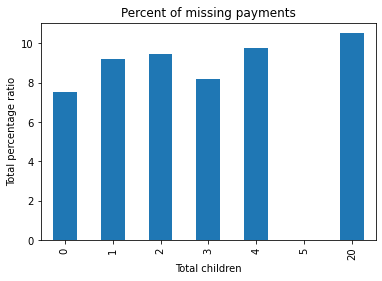

In [87]:
plt.title("Percent of missing payments")
children_pivot['ratio'].plot(kind='bar')
plt.xlabel("Total children")
plt.ylabel("Total percentage ratio")
plt.show()

### Conclusion

- Total customers have children is 7316 from 21454 customers which is 34.1% 
- Total customers have NO children is 14138 from 21454 customers which is 65.9%


- Total parents have debt is 677 from total 7316 parents which is 9.25%
- Total parents have NO debt is 6639 from total 7316 parents which is 90.75%


- Total no children have debt is 1064 from total 14138 no children which is 7.53%
- Total no children have no debt is 13074 from total 14138 no children which is 92.47%


- 92.47% customers that have no children paid their loan on time
- 90% customers that **have children** have no debt, so they **paid their loan on time**


- Possibility missed paying their loan on time for customers with children is 9.25%
- Possibility missed paying their loan on time for customers with no children is 7.53%


- Customers that have 20 children has 10.53% to miss paying their loan on time, compare to others customers that have the same amount of children. It has a higher probability of missing payments compare to other customers with children category.

- #### Is there a relation between marital status and repaying a loan on time?

In [88]:
for status in data['family_status'].unique():
    family_status = data['family_status'][(data['family_status']==status) & (data['debt']==0)].count()
    total = data['family_status'][data['family_status']==status].count()
    family_status_percent = round(family_status/ total * 100, 2)
    print(f"{family_status_percent}% of {status} marital status have paid their loans on time")

92.45% of married marital status have paid their loans on time
90.65% of civil partnership marital status have paid their loans on time
93.43% of widow / widower marital status have paid their loans on time
92.89% of divorced marital status have paid their loans on time
90.25% of unmarried marital status have paid their loans on time


In [89]:
data['family_status'].value_counts().index

Index(['married', 'civil partnership', 'unmarried', 'divorced',
       'widow / widower'],
      dtype='object')

In [90]:
marital_pivot = data.pivot_table(index=['family_status', 'family_status_id'], values=['debt'], aggfunc=['sum', 'count'])
marital_pivot['ratio'] = round(marital_pivot[('sum', 'debt')] / marital_pivot[('count', 'debt')] *100,2)
marital_pivot

,,sum,count,ratio
,,debt,debt,
family_status,family_status_id,,,
civil partnership,1,388,4151,9.35
divorced,3,85,1195,7.11
married,0,931,12339,7.55
unmarried,4,274,2810,9.75
widow / widower,2,63,959,6.57


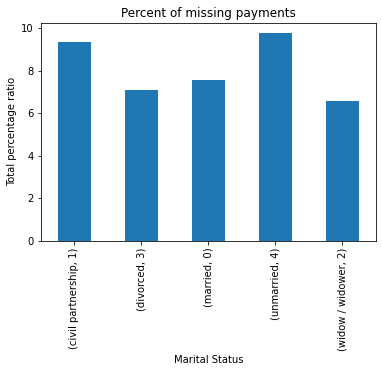

In [91]:
plt.title("Percent of missing payments")
marital_pivot['ratio'].plot(kind='bar', x=['family_status'])
plt.xlabel("Marital Status")
plt.ylabel("Total percentage ratio")
plt.show()

### Conclusion

- All marital status have 90% probability to pay their loans on time and have low probability missing their payments
- Unmarried and civil partnership have more missing payments than other marital status category

- #### Is there a relation between income level and repaying a loan on time?

In [92]:
for cat in data['total_income_category'].unique():
    income_category = data['total_income_category'][(data['total_income_category']==cat) & (data['debt']==0)].count()
    total = data['total_income_category'][data['total_income_category']==cat].count()
    family_status_percent = round(income_category/ total * 100, 2)
    print(f"{family_status_percent}% of {cat} income category have paid their loans on time")

92.86% of High income category have paid their loans on time
91.47% of Middle income category have paid their loans on time
91.09% of Upper Middle income category have paid their loans on time
92.04% of Low income category have paid their loans on time


In [93]:
pivot_income = data.pivot_table(index=['total_income_category'], values=['debt'], aggfunc=['sum', 'count'])
pivot_income['ratio'] = round(pivot_income[('sum', 'debt')]/ pivot_income['count', 'debt'] * 100, 2)
pivot_income

,sum,count,ratio
,debt,debt,
total_income_category,,,
High,383,5364,7.14
Low,427,5364,7.96
Middle,547,6415,8.53
Upper Middle,384,4311,8.91


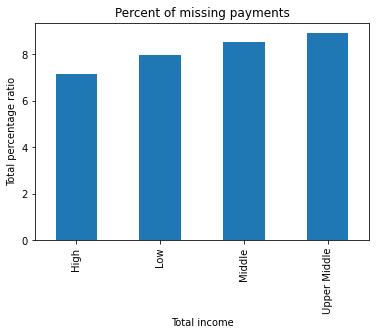

In [94]:
plt.title("Percent of missing payments")
pivot_income['ratio'].plot(kind='bar', x=['total_income_category'])
plt.xlabel("Total income")
plt.ylabel("Total percentage ratio")
plt.show()

### Conclusion

- All income category have more than 90% probability to pay their loans on time and have low probability missing their payments

- #### How do different loan purposes affect on-time repayment of the loan?

In [95]:
for cat in data['purpose_category'].unique():
    purpose_category = data['purpose_category'][(data['purpose_category']==cat) & (data['debt']==0)].count()
    total = data['purpose_category'][data['purpose_category']==cat].count()
    purpose_percent = round(purpose_category/ total * 100, 2)
    print(f"{purpose_percent}% {cat} purpose category have paid their loans on time")

92.97% house purpose category have paid their loans on time
90.64% car purpose category have paid their loans on time
90.78% education purpose category have paid their loans on time
92.0% wedding purpose category have paid their loans on time
92.47% real estate purpose category have paid their loans on time


In [96]:
pivot_purpose = data.pivot_table(index=['purpose_category'], values=['debt'], aggfunc=['sum', 'count'])
pivot_purpose['ratio'] = round(pivot_purpose[('sum', 'debt')]/ pivot_purpose['count', 'debt'] * 100, 2)
pivot_purpose

,sum,count,ratio
,debt,debt,
purpose_category,,,
car,403,4306,9.36
education,370,4013,9.22
house,446,6347,7.03
real estate,336,4464,7.53
wedding,186,2324,8.00


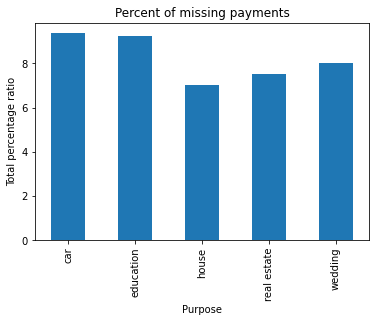

In [97]:
plt.title("Percent of missing payments")
pivot_purpose['ratio'].plot(kind='bar', x=['purpose_category'])
plt.xlabel("Purpose")
plt.ylabel("Total percentage ratio")
plt.show()

### Conclusion

- All purpose category have more than 90% probability to pay their loans on time and have low probability missing their payments
- Car and education have more missing payments than other purpose category

- #### How do age affect on-time repayment of the loan?

In [98]:
for cat in data['age_category'].unique():
    age_category = data['age_category'][(data['age_category']==cat) & (data['debt']==0)].count()
    total = data['age_category'][data['age_category']==cat].count()
    age_category_percent = round(age_category/ total * 100, 2)
    print(f"{age_category_percent}% of {cat} age category have paid their loans on time")

92.38% of Middle age category have paid their loans on time
89.4% of Young age category have paid their loans on time
94.36% of Upper Middle age category have paid their loans on time
95.01% of Senior age category have paid their loans on time


In [99]:
pivot_age = data.pivot_table(index=['age_category'], values=['debt'], aggfunc=['sum', 'count'])
pivot_age['ratio'] = round(pivot_age[('sum', 'debt')]/ pivot_age['count', 'debt'] * 100, 2)
pivot_age

,sum,count,ratio
,debt,debt,
age_category,,,
Middle,803,10535,7.62
Senior,35,702,4.99
Upper Middle,205,3634,5.64
Young,698,6583,10.60


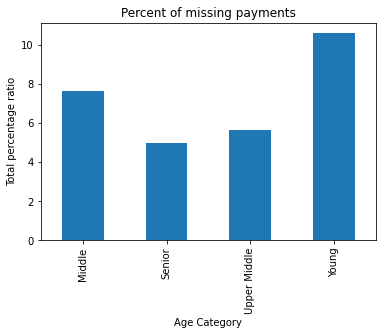

In [100]:
plt.title("Percent of missing payments")
pivot_age['ratio'].plot(kind='bar', x=['age_category'])
plt.xlabel("Age Category")
plt.ylabel("Total percentage ratio")
plt.show()

### Conclusion
- Young age category has 10.60% probability of missing payments and it has higher percentage of missing payments than other age category

- #### How do education affect on-time repayment of the loan?

In [101]:
data['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [104]:
for cat in data['education'].unique():
    education_category = data['education'][(data['education']==cat) & (data['debt']==0)].count()
    total = data['education'][data['education']==cat].count()
    education_category_percent = round(education_category/ total * 100, 2)
    print(f"{education_category_percent}% of {cat} education have paid their loans on time")

94.7% of bachelor's degree education have paid their loans on time
91.01% of secondary education education have paid their loans on time
90.86% of some college education have paid their loans on time
89.01% of primary education education have paid their loans on time
100.0% of graduate degree education have paid their loans on time


In [105]:
pivot_education = data.pivot_table(index=['education'], values=['debt'], aggfunc=['sum', 'count'])
pivot_education['ratio'] = round(pivot_education[('sum', 'debt')]/ pivot_education['count', 'debt'] * 100, 2)
pivot_education

,sum,count,ratio
,debt,debt,
education,,,
bachelor's degree,278,5250,5.30
graduate degree,0,6,0.00
primary education,31,282,10.99
secondary education,1364,15172,8.99
some college,68,744,9.14


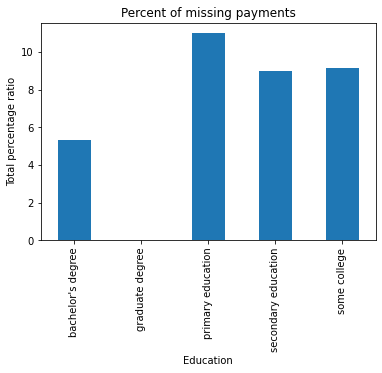

In [106]:
plt.title("Percent of missing payments")
pivot_education['ratio'].plot(kind='bar', x=['age_category'])
plt.xlabel("Education")
plt.ylabel("Total percentage ratio")
plt.show()

### Conclusion
- Graduate degree always pays their loan on time
- Primary education degree has 11% missing payment and it has higher probability of missing payment compare to other education category

### Step 4. General conclusion

- After analyzing the data, all customers in **purpose, marital status, children, total income** category have **high rate of 90% probabilty** to **pay their loans on time**
- In age category, the customers with **young age** category has **highest** rate to **miss paying their loan on time**
- **senior** has **lowest** probability **missing** their payments.
- In education category, the customers with **graduate degree 100% always pay** their loans on time
- **primary education** category has **highest** probability to **miss paying** their loans on time


- Customers who are **unmarried, have lot of children, applying for buying a car or for their university (student loan)** has **highest** probability to **miss paying** their loan

- Customers who are **graduate degree, senior, high income, widow, no children, applying for home loan** has **lowest** probability to **miss paying** their loan.


- In conclusion **lowest education (primary education)** and **young age** category has the **lowest** probability of all category to pay their loan on time. while other category most likely will pay their loan on time. 